### Assignment for Classification of Street View House Number Images ###
*Step 1 below is to access the folders on Google Drive where the images are stored* 

In [1]:
import tensorflow as tf
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


*Step 2 is to read the H5 file, its indexes and then tag each index to its individual array*

In [0]:
import h5py
filename = '/content/gdrive/My Drive/SVHN_single_grey1.h5'

In [0]:
f = h5py.File(filename, 'r')

In [5]:
for key in f.keys():
    print(key) #Names of the groups in HDF5 file.

X_test
X_train
X_val
y_test
y_train
y_val


In [0]:
X_test = np.array(f['X_test'].value)
X_train = np.array(f['X_train'].value)
X_val = np.array(f['X_val'].value)
y_test = np.array(f['y_test'].value)
y_train = np.array(f['y_train'].value)
y_val = np.array(f['y_val'].value)

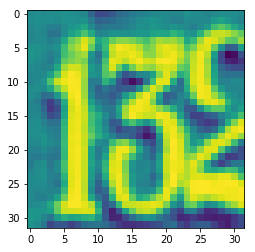

In [7]:
from matplotlib import pyplot as plt
plt.imshow(X_test[51], interpolation='nearest')
plt.show()

In [8]:
y_test[51]

3

In [0]:
f.close()

* Next Step is to flatten the train and test feature matrices*

In [10]:
X_train.shape

(42000, 32, 32)

In [0]:
X_trainf = X_train.reshape(X_train.shape[0], 32 * 32)

In [0]:
X_testf = X_test.reshape(X_test.shape[0], 32 * 32)

In [13]:
X_trainf.shape

(42000, 1024)

In [14]:
X_testf.shape

(18000, 1024)

### Implement and Apply optimal k Nearest Neighbour (kNN) classifier (7.5 Points)###

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [0]:
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

In [17]:
nn = KNeighborsClassifier() # create a Nearest Neighbor classifier class
nn.fit(X_trainf, y_train) # train the classifier on the training images and labels

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
nn.score(X_testf,y_test)

0.49016666666666664

**The above model is usage of KNN for identifying the image class**
*As an additional step the predicted outcome is also stored in a dataframe for further usage

In [0]:
y_pred_knn = nn.predict(X_testf)

In [0]:
from sklearn.metrics import classification_report

In [0]:
target_names = ['0','1','2','3','4','5','6','7','8','9']

**Print the Classification Metric Report (2.5 Points)**

In [35]:
print(classification_report(y_test, y_pred_knn, target_names=target_names))

              precision    recall  f1-score   support

           0       0.38      0.66      0.48      1814
           1       0.44      0.70      0.54      1828
           2       0.55      0.52      0.53      1803
           3       0.42      0.39      0.41      1719
           4       0.67      0.61      0.64      1812
           5       0.48      0.36      0.41      1768
           6       0.47      0.38      0.42      1832
           7       0.72      0.58      0.64      1808
           8       0.42      0.33      0.37      1812
           9       0.52      0.36      0.43      1804

   micro avg       0.49      0.49      0.49     18000
   macro avg       0.51      0.49      0.49     18000
weighted avg       0.51      0.49      0.49     18000



### Implement and Apply a Deep Neural Network Classifier (including feedforward neural networks, RELU Activations) 2.5 Points ###

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, Reshape, BatchNormalization
from keras import backend as K

**Model Definition with RELU Activations**

In [0]:
model_dnn = Sequential()

**Implement Batch Normalisation**

In [0]:
model_dnn.add(Reshape((1024,),input_shape=(32,32,), name = 'input'))

In [0]:
model_dnn.add(BatchNormalization())

In [0]:
model_dnn.add(Dense(200, activation='relu',name = 'Dense_1'))
model_dnn.add(Dense(100, activation='relu',name = 'Dense_2'))
model_dnn.add(Dense(100, activation='relu',name = 'Dense_3'))

In [0]:
model_dnn.add(Dense(10, activation='softmax',name = 'Dense_4'))

In [35]:
model_dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Reshape)              (None, 1024)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
Dense_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
Dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Dense_4 (Dense)              (None, 10)                1010      
Total params: 240,306
Trainable params: 238,258
Non-trainable params: 2,048
_________________________________________________________________


### Vectorised back propagation with Stochastic Gradient Optimisation and Cross Entropy Loss ###

In [0]:
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

In [0]:
model_dnn.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

In [0]:
y_train_class = keras.utils.to_categorical(y_train, 10)

In [0]:
y_test_class = keras.utils.to_categorical(y_test, 10)

In [40]:
X_train.shape

(42000, 32, 32)

In [52]:
%time
output_transfer = model_dnn.fit(X_train, y_train_class, batch_size=128, epochs=10, verbose=1, validation_split = 0.2)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 5s 153us/step - loss: 0.8519 - acc: 0.7413 - val_loss: 0.8771 - val_acc: 0.7356
Epoch 2/10
33600/33600 [==============================] - 5s 162us/step - loss: 0.8042 - acc: 0.7568 - val_loss: 0.8450 - val_acc: 0.7443
Epoch 3/10
33600/33600 [==============================] - 5s 160us/step - loss: 0.7721 - acc: 0.7669 - val_loss: 0.8138 - val_acc: 0.7539
Epoch 4/10
33600/33600 [==============================] - 5s 154us/step - loss: 0.7383 - acc: 0.7763 - val_loss: 0.8162 - val_acc: 0.7519
Epoch 5/10
33600/33600 [==============================] - 5s 160us/step - loss: 0.7132 - acc: 0.7835 - val_loss: 0.7955 - val_acc: 0.7581
Epoch 6/10
33600/33600 [==============================] - 6s 167us/step - loss: 0.6861 - acc: 0.7913 - val_loss: 0.7642 - val_acc: 0.7712
Epoch 7/10
33600/33600 [==============================] - 5

In [0]:
y_pred_dnn = model_dnn.predict(X_test)